In [29]:
import os
import shutil
import pandas as pd

# Chemins
chemin_fichier = "batch_4.csv"  # Remplacez par le chemin réel du fichier CSV
chemin_images = "validation_filtré"  # Dossier contenant les images originales
chemin_destination = "validation"  # Dossier de destination des images triées

# Charger le fichier CSV
df = pd.read_csv(chemin_fichier, sep=',')  # Modifier le séparateur si nécessaire

# Création des dossiers et déplacement des images
for index, row in df.iterrows():
    image_name = row['image_name']
    category = str(row['category'])  # S'assurer que c'est une chaîne
    
    # Définir le chemin du dossier cible
    dossier_categorie = os.path.join(chemin_destination, category)
    os.makedirs(dossier_categorie, exist_ok=True)  # Crée le dossier s'il n'existe pas
    
    # Déplacer l'image
    image_source = os.path.join(chemin_images, image_name)
    image_dest = os.path.join(dossier_categorie, image_name)
    
    if os.path.exists(image_source):
        shutil.move(image_source, image_dest)
    else:
        print(f"Image non trouvée : {image_source}")

print("Organisation terminée !")


Image non trouvée : validation_filtré\image_631246_product_984304.jpg
Image non trouvée : validation_filtré\image_1063831_product_1157144.jpg
Image non trouvée : validation_filtré\image_137609430_product_1906192.jpg
Image non trouvée : validation_filtré\image_158554130_product_1288702.jpg
Image non trouvée : validation_filtré\image_197401530_product_5913718.jpg
Image non trouvée : validation_filtré\image_310317432_product_46565050.jpg
Image non trouvée : validation_filtré\image_438012288_product_49843702.jpg
Image non trouvée : validation_filtré\image_858194557_product_92413946.jpg
Image non trouvée : validation_filtré\image_874538407_product_102313516.jpg
Image non trouvée : validation_filtré\image_508685383_product_52348929.jpg
Image non trouvée : validation_filtré\image_933246596_product_190099934.jpg
Image non trouvée : validation_filtré\image_875245740_product_120815258.jpg
Image non trouvée : validation_filtré\image_890393093_product_112462775.jpg
Image non trouvée : validation_f

Neural Network perso

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Chemins
chemin_train = "dataset"

img_height, img_width = 150, 150
batch_size = 32

# Préparation des données
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
)
train_generator = train_datagen.flow_from_directory(
    chemin_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    chemin_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])



# Compilation du modèle
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30
)

# Sauvegarde du modèle
model.save("modele_cnn.h5")
print("Modèle entraîné et sauvegardé !")

Found 234 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


Epoch 1/30
8/8 [==============================] - 6s 561ms/step - loss: 13.8667 - accuracy: 0.2863
Epoch 2/30
8/8 [==============================] - 4s 514ms/step - loss: 1.6523 - accuracy: 0.3504
Epoch 3/30
8/8 [==============================] - 4s 465ms/step - loss: 1.6419 - accuracy: 0.3291
Epoch 4/30
8/8 [==============================] - 4s 467ms/step - loss: 1.6649 - accuracy: 0.3889
Epoch 5/30
8/8 [==============================] - 4s 458ms/step - loss: 1.6445 - accuracy: 0.3932
Epoch 6/30
8/8 [==============================] - 4s 517ms/step - loss: 1.6363 - accuracy: 0.3974
Epoch 7/30
8/8 [==============================] - 4s 521ms/step - loss: 1.6686 - accuracy: 0.4188
Epoch 8/30
8/8 [==============================] - 5s 587ms/step - loss: 1.5878 - accuracy: 0.3974
Epoch 9/30
8/8 [==============================] - 6s 670ms/step - loss: 1.5926 - accuracy: 0.4017
Epoch 10/30
8/8 [==============================] - 5s 575ms/step - loss: 1.6310 - accuracy: 0.3889
Epoch 11/30
8/8 [=

Found 119 images belonging to 10 classes.


4/4 [==============================] - 1s 244ms/step


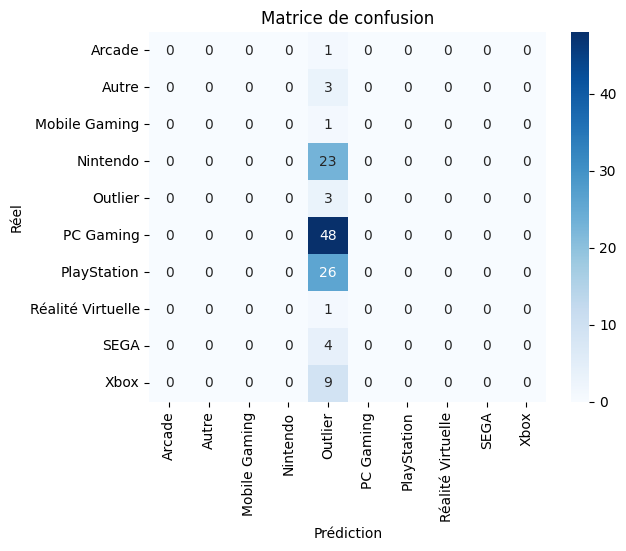

                   precision    recall  f1-score   support

           Arcade       0.00      0.00      0.00         1
            Autre       0.00      0.00      0.00         3
    Mobile Gaming       0.00      0.00      0.00         1
         Nintendo       0.00      0.00      0.00        23
          Outlier       0.03      1.00      0.05         3
        PC Gaming       0.00      0.00      0.00        48
      PlayStation       0.00      0.00      0.00        26
Réalité Virtuelle       0.00      0.00      0.00         1
             SEGA       0.00      0.00      0.00         4
             Xbox       0.00      0.00      0.00         9

         accuracy                           0.03       119
        macro avg       0.00      0.10      0.00       119
     weighted avg       0.00      0.03      0.00       119



C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [13]:
import os
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Chemins

chemin_test = "test"

# Paramètres du modèle
img_height, img_width = 150, 150
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator= test_datagen.flow_from_directory(
    chemin_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Chargement du modèle
model = keras.models.load_model("modele_cnn.h5")

# Évaluation sur le jeu de test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Filtre sur les classes peu frèquentes

In [ ]:
import os
import shutil

def filtrer_classes(dossier_source, dossier_destination, classes_à_garder):
    if not os.path.exists(dossier_destination):
        os.makedirs(dossier_destination)

    for classe in os.listdir(dossier_source):
        if classe not in classes_à_garder:
            continue
        chemin_classe_source = os.path.join(dossier_source, classe)
        chemin_classe_dest = os.path.join(dossier_destination, classe)
        os.makedirs(chemin_classe_dest, exist_ok=True)

        for image in os.listdir(chemin_classe_source):
            shutil.copy(
                os.path.join(chemin_classe_source, image),
                os.path.join(chemin_classe_dest, image)
            )

# Étape 1 : Identifier les classes valides dans le dataset d'entraînement
dataset_dir = "dataset"
min_images = 10
classes_valides = [cls for cls in os.listdir(dataset_dir)
                   if len(os.listdir(os.path.join(dataset_dir, cls))) >= min_images]

# Étape 2 : Appliquer le filtrage sur les 3 jeux
filtrer_classes("dataset", "dataset_filtré", classes_valides)
filtrer_classes("validation", "validation_filtré", classes_valides)

filtrer_classes("test", "test_filtré", classes_valides)


Transfert learning baseline

Found 213 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)   

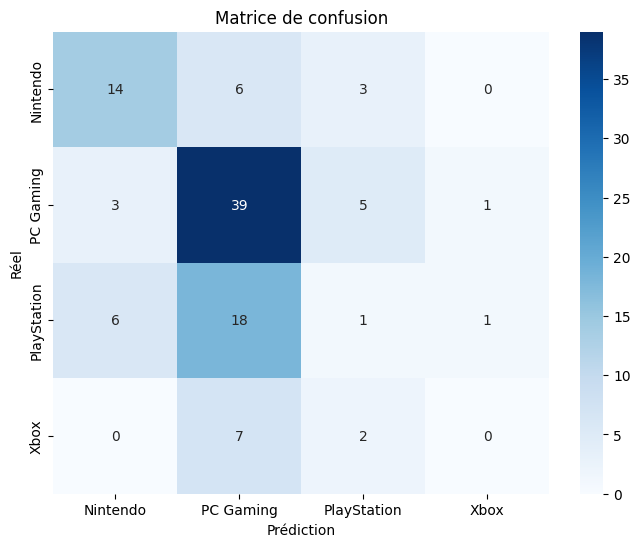


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.61      0.61      0.61        23
   PC Gaming       0.56      0.81      0.66        48
 PlayStation       0.09      0.04      0.05        26
        Xbox       0.00      0.00      0.00         9

    accuracy                           0.51       106
   macro avg       0.31      0.36      0.33       106
weighted avg       0.41      0.51      0.44       106


Accuracy globale : 0.5094
Précision globale : 0.3142


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Paramètres
img_height, img_width = 150, 150
batch_size = 32
epochs = 50

# === Générateurs ===

# Data Augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Générateur de validation/test (pas d'augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'test_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# === Modèle avec Transfert Learning ===

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze les couches pré-entraînées

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# === Entraînement ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

# === Sauvegarde ===
model.save("modele_cnn_transfer.h5")
print("✅ Modèle sauvegardé !")

# === Évaluation ===

# Prédictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Accuracy & Précision globale
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")


Transfert learning fine tune sans data augmentation

Found 213 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Epoch 1/10
7/7 [==============================] - 8s 532ms/step - loss: 0.4918 - accuracy: 0.8404
Epoch 2/10
7/7 [==============================] - 4s 577ms/step - loss: 0.4559 - accuracy: 0.8263
Epoch 3/10
7/7 [==============================] - 3s 399ms/step - loss: 0.5202 - accuracy: 0.8169
Epoch 4/10
7/7 [==============================] - 3s 416ms/step - loss: 0.4756 - accuracy: 0.7981
Epoch 5/10
7/7 [==============================] - 3s 409ms/step - loss: 0.4195 - accuracy: 0.8545
Epoch 6/10
7/7 [==============================] - 3s 385ms/step - loss: 0.4440 - accuracy: 0.8685
Epoch 7/10
7/7 [==============================] - 3s 414ms/step - loss: 0.4537 - accuracy: 0.8451
Epoch 8/10
7/7 [==============================] - 3s 381ms/step - loss: 0.4133 - accuracy: 0.8592
Epoch 9/10
7/7 [==============================] - 3s 389ms/step - loss: 0.3880 - accuracy: 0.8779
Epoch 10/10
7/7 [===================

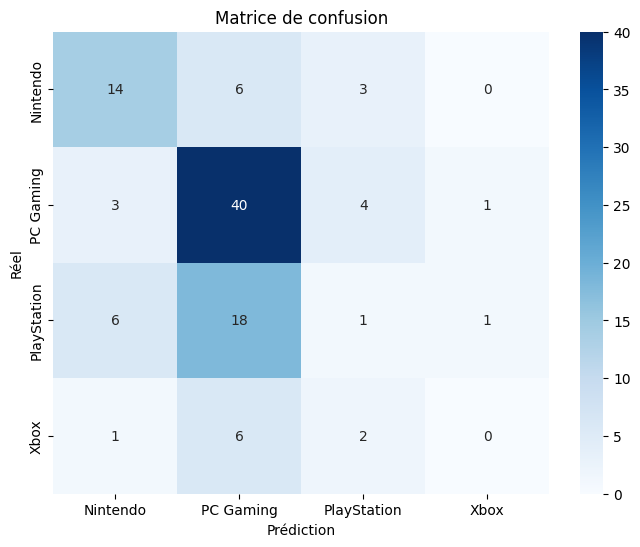


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.58      0.61      0.60        23
   PC Gaming       0.57      0.83      0.68        48
 PlayStation       0.10      0.04      0.06        26
        Xbox       0.00      0.00      0.00         9

    accuracy                           0.52       106
   macro avg       0.31      0.37      0.33       106
weighted avg       0.41      0.52      0.45       106


Accuracy globale : 0.5189
Précision globale : 0.3137


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Paramètres
img_height, img_width = 150, 150
batch_size = 32
epochs = 50

# === Générateurs ===

# Data Augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Générateur de validation/test (pas d'augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'test_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# === Modèle avec Transfert Learning ===

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
# Débloquer les couches du modèle de base à partir d'un certain point
base_model.trainable = True

# On ne réentraîne que les couches les plus profondes (fine-tuning partiel)
fine_tune_at = 100  # Choisis une valeur vers la fin
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompiler avec un taux d'apprentissage plus petit
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Relancer l'entraînement
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # 5–10 epochs suffisent souvent
    callbacks=[early_stop]
)


model.summary()

# === Entraînement ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

# === Sauvegarde ===
model.save("modele_cnn_transfer.h5")
print("✅ Modèle sauvegardé !")

# === Évaluation ===

# Prédictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Accuracy & Précision globale
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")


transfert learning fine tune avec data augmentation

Found 213 images belonging to 4 classes.
Found 0 images belonging to 0 classes.


Found 106 images belonging to 4 classes.
Epoch 1/30
7/7 [==============================] - 8s 474ms/step - loss: 2.6003 - accuracy: 0.1878
Epoch 2/30
7/7 [==============================] - 3s 466ms/step - loss: 2.0700 - accuracy: 0.2347
Epoch 3/30
7/7 [==============================] - 3s 395ms/step - loss: 1.8820 - accuracy: 0.3521
Epoch 4/30
7/7 [==============================] - 3s 373ms/step - loss: 1.6537 - accuracy: 0.3850
Epoch 5/30
7/7 [==============================] - 3s 374ms/step - loss: 1.6089 - accuracy: 0.3850
Epoch 6/30
7/7 [==============================] - 3s 377ms/step - loss: 1.5540 - accuracy: 0.4131
Epoch 7/30
7/7 [==============================] - 3s 373ms/step - loss: 1.5875 - accuracy: 0.4085
Epoch 8/30
7/7 [==============================] - 3s 379ms/step - loss: 1.5377 - accuracy: 0.3897
Epoch 9/30
7/7 [==============================] - 3s 419ms/step - loss: 1.6072 - accuracy: 0.3568
Epoch 10/30
7/7 [==============================] - 3s 377ms/step - loss: 1.41

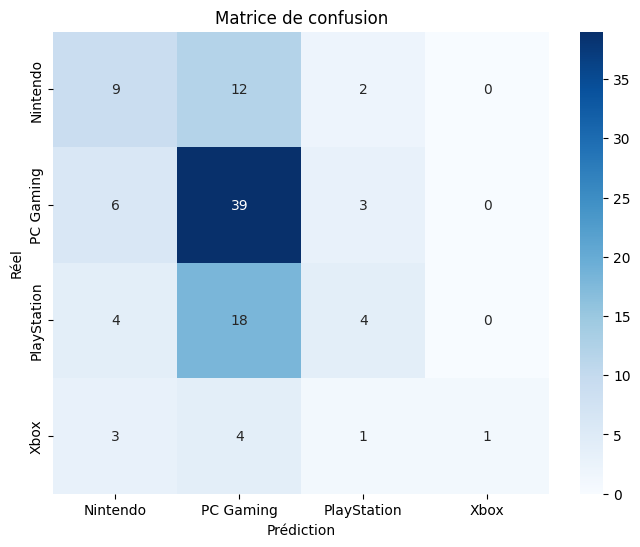


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.41      0.39      0.40        23
   PC Gaming       0.53      0.81      0.64        48
 PlayStation       0.40      0.15      0.22        26
        Xbox       1.00      0.11      0.20         9

    accuracy                           0.50       106
   macro avg       0.59      0.37      0.37       106
weighted avg       0.51      0.50      0.45       106



In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight


# === PARAMÈTRES ===
img_height, img_width = 150, 150
batch_size = 32
num_epochs = 30

train_dir = "dataset_filtré"
val_dir = "validation"
test_dir = "test_filtré"

# === DATA AUGMENTATION ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Récupère les classes du générateur
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
y_train = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# === BASE MODEL (MOBILENETV2) ===
base_model = keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # gelé pour première phase

# === ARCHITECTURE ===
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# === COMPILATION ===
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === CALLBACKS ===
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# === ENTRAÎNEMENT PHASE 1 ===
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    callbacks=[early_stop]
)

# === FINE-TUNING PHASE 2 ===
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop],
    class_weight=class_weights

)


# === ÉVALUATION SUR TEST SET ===
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# === MATRICE DE CONFUSION ===
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# === RAPPORT DE CLASSIFICATION ===
print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
# Accuracy & Précision globale
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")

In [26]:
# Accuracy & Précision globale
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")


Accuracy globale : 0.5000
Précision globale : 0.5858


Found 213 images belonging to 4 classes.


Found 57 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Epoch 1/20
7/7 [==============================] - 10s 943ms/step - loss: 1.9065 - accuracy: 0.3568 - val_loss: 1.5296 - val_accuracy: 0.4386
Epoch 2/20
7/7 [==============================] - 5s 699ms/step - loss: 1.5284 - accuracy: 0.4225 - val_loss: 1.4803 - val_accuracy: 0.3158
Epoch 3/20
7/7 [==============================] - 6s 941ms/step - loss: 1.8727 - accuracy: 0.3099 - val_loss: 1.4345 - val_accuracy: 0.4211
Epoch 4/20
7/7 [==============================] - 5s 741ms/step - loss: 1.6100 - accuracy: 0.3286 - val_loss: 1.3874 - val_accuracy: 0.4211
Epoch 5/20
7/7 [==============================] - 6s 907ms/step - loss: 1.5746 - accuracy: 0.4225 - val_loss: 1.3415 - val_accuracy: 0.4386
Epoch 6/20
7/7 [==============================] - 7s 1s/step - loss: 1.5600 - accuracy: 0.4038 - val_loss: 1.3102 - val_accuracy: 0.4386
Epoch 7/20
7/7 [==============================] - 7s 1s/step - loss: 1.4916 - acc

ValueError: x and y must have same first dimension, but have shapes (20,) and (9,)

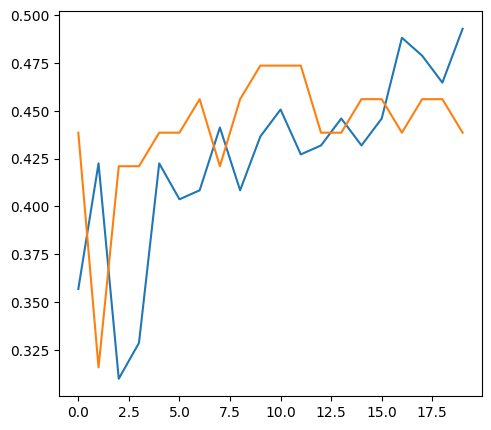

In [32]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# === PARAMÈTRES ===
img_height, img_width = 150, 150
batch_size = 32
num_epochs = 20
train_dir = "dataset_filtré"
val_dir = "validation"
test_dir = "test_filtré"

# === DATA AUGMENTATION ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# === CALLBACKS ===
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# === MODEL 1 : MobileNetV2 ===
base_model_mobilenet = keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model_mobilenet.trainable = False  # gelé pour la première phase

mobilenet_model = keras.Sequential([
    base_model_mobilenet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

mobilenet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === ENTRAÎNEMENT DU MODÈLE MobileNetV2 ===
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    callbacks=[early_stop]
)

# === MODEL 2 : ResNet50 ===
base_model_resnet = keras.applications.ResNet50(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model_resnet.trainable = False  # gelé pour la première phase

resnet_model = keras.Sequential([
    base_model_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

resnet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === ENTRAÎNEMENT DU MODÈLE ResNet50 ===
resnet_history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    callbacks=[early_stop]
)

# === COMPARAISON DES RÉSULTATS ===
def plot_comparison_history(mobilenet_history, resnet_history):
    plt.figure(figsize=(12, 5))

    # MobileNetV2
    acc_mobilenet = mobilenet_history.history['accuracy']
    val_acc_mobilenet = mobilenet_history.history['val_accuracy']
    loss_mobilenet = mobilenet_history.history['loss']
    val_loss_mobilenet = mobilenet_history.history['val_loss']

    # ResNet50
    acc_resnet = resnet_history.history['accuracy']
    val_acc_resnet = resnet_history.history['val_accuracy']
    loss_resnet = resnet_history.history['loss']
    val_loss_resnet = resnet_history.history['val_loss']

    epochs_range = range(len(acc_mobilenet))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc_mobilenet, label="MobileNetV2 Train")
    plt.plot(epochs_range, val_acc_mobilenet, label="MobileNetV2 Val")
    plt.plot(epochs_range, acc_resnet, label="ResNet50 Train")
    plt.plot(epochs_range, val_acc_resnet, label="ResNet50 Val")
    plt.title('Accuracy Comparison')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss_mobilenet, label="MobileNetV2 Train")
    plt.plot(epochs_range, val_loss_mobilenet, label="MobileNetV2 Val")
    plt.plot(epochs_range, loss_resnet, label="ResNet50 Train")
    plt.plot(epochs_range, val_loss_resnet, label="ResNet50 Val")
    plt.title('Loss Comparison')
    plt.legend()

    plt.show()

plot_comparison_history(mobilenet_history, resnet_history)

# === ÉVALUATION SUR TEST SET ===
def evaluate_model(model, test_generator):
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\n=== Rapport de classification ===")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Prédiction')
    plt.ylabel('Réel')
    plt.title('Matrice de confusion')
    plt.show()

    return y_pred_classes, y_true, class_labels

# Comparaison sur le jeu de test
print("\n### Évaluation avec MobileNetV2 ###")
evaluate_model(mobilenet_model, test_generator)

print("\n### Évaluation avec ResNet50 ###")
evaluate_model(resnet_model, test_generator)
